# **Lecture** Designing Behavioral Experiments in Python 

### In order to perform experiments, we have to deliver stimuli and collect responses from the subjects.
### Most experiments make use of visual stimuli, and in Python there is a module called Psychopy that most labs use for that.  
### However, programming visual displays is extremely hardware dependent so for this class we will focus on the *control of experiments* and use sound stimuli.   


### In this section we will learn how make use of python to deliver an auditory stimulus using the 
### **simpleaudio** module.  
### To install simpleaudio, open either a Terminal (mac) or PowerShell prompt from Anaconda Navigator (windows)
### Be sure you see the term (base) to the left of the prompt. 
### then type 
### pip install simpleaudio 
 

### For simplicity, in this class, we will collect behavioral responses using the keyboard, using the `input` function.  
### Please note that this is good practice **only** if you do not want to make use of very high accuracy *response time* information on individual truals.

In [1]:
import numpy as np 
from numpy import random 
import simpleaudio as sa
from matplotlib import pyplot as plt
rng = random.default_rng(seed = 1111)

## Playing Pure Tones through your sound card

### The simplest auditory stimuli is a pure tone.  A pure tone is a sine wave of a particular frequency. 
### It is perceived as having a particular pitch, which you may identify as a musical note. 

In [2]:
# create a sinusoidal sound wave
sr = 44100     # how many samples per second 
               #This is the optimal choice for modern sound cards 
time = 0.2     # duration
volume = 0.25   # DO NOT EXCEED 0.5

frequency = 440 # cycles per second 
time_vec = np.linspace(0, time, int(time*sr)) 
test_note = np.sin(frequency * time_vec  * 2 * np.pi)

# the sample amplitude values must consequently fall in the range of -32768 to 32767. 
test_note  = 32767*(test_note / np.max(np.abs(test_note)))  
# FOR SAFETY.  PLEASE LIMIT THE MAXIMUM VOLUME!
test_note = volume*test_note
# they must also have a signed 16-bit integer dtype (=2 bytes) and 
test_note  = test_note.astype(np.int16)

sa.play_buffer(test_note , 1, 2, sr) 
#the parameters here are
#sa.play_buffer(sound_array,numberofchannels,bytes_per_sample,sample_rate)

## Quick review of sine functions
### $x = sin(j*\theta)$ where $\theta$ ranges from 0 to $2*\pi$

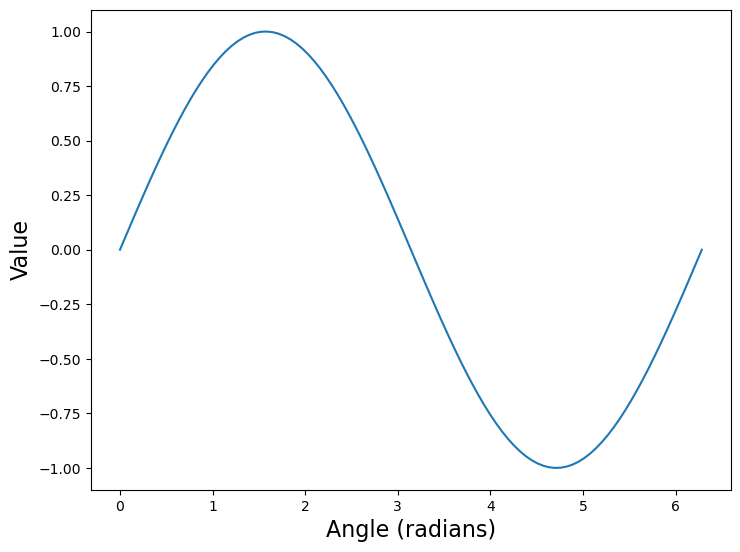

In [3]:
angle_vec = np.linspace(0,2*np.pi,100) # I am using linspace to make 100 samples between 0 and 2*pi
sinefunction = np.sin(angle_vec)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(angle_vec,sinefunction)
ax.set_xlabel('Angle (radians)',fontsize = 16)
ax.set_ylabel('Value',fontsize = 16)
plt.show()


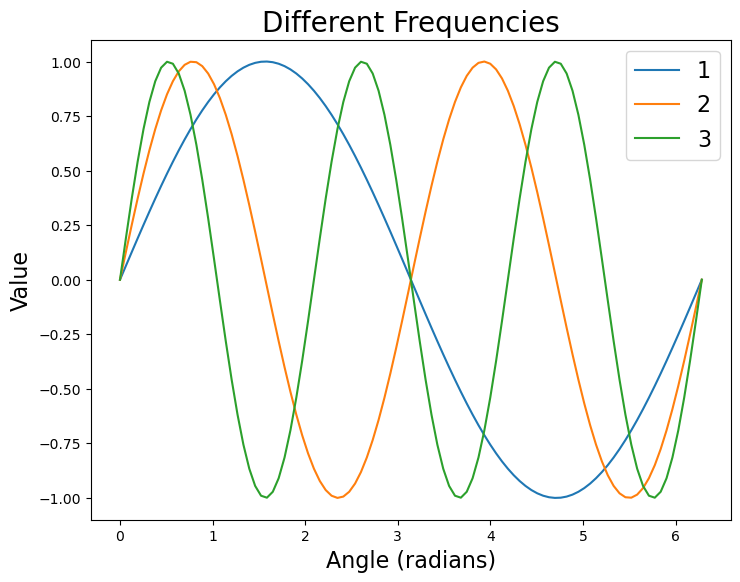

In [4]:
angle_vec = np.linspace(0,2*np.pi,100)# I am using linspace to make 100 samples between 0 and 2*pi
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Angle (radians)',fontsize = 16)
ax.set_ylabel('Value',fontsize = 16)
for j in range(3):
    sinefunction = np.sin((j+1)*angle_vec)
    ax.plot(angle_vec,sinefunction,label = str(j+1))
ax.legend(fontsize = 16)    
ax.set_title('Different Frequencies',fontsize = 20)
plt.show()

### Sound unfolds over time. 
### Sounds are pressure waves unfolding over time.  
### If we want to make use of our sinusoid as sound stimuli, we need to think about them as a function of time. 

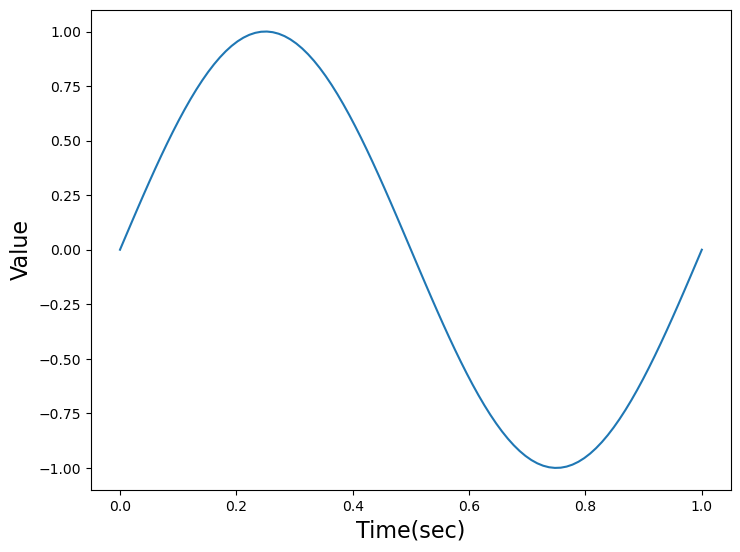

In [5]:
duration = 1 # seconds 
timesteps = np.linspace(0,duration,100)
anglesteps = timesteps*2*np.pi  # This is a mapping between time and angle.  In this line of code
                                # I am mapping 1 second of time to the the interval 0 to 2 pi
frequency = 1
sinefunction = np.sin(frequency*anglesteps)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(timesteps,sinefunction)
ax.set_xlabel('Time(sec)',fontsize = 16)
ax.set_ylabel('Value',fontsize = 16)
plt.show()


## Units in Sound 

### There are several quantities relevant to describing sound
* ### frequency.  The frequency of sound is described in units of Hz or cycles per second. 
* ### Amplitude.  The Amplitude of the sound is the size of the wave. The units here (for programming purposes) are arbitrary, since the true amplitude also depends on your sound card, the controls on your computer, etc. 

## $x = A*sin(2*\pi*f*t))$  where f is frequency and A is amplitude and t is time

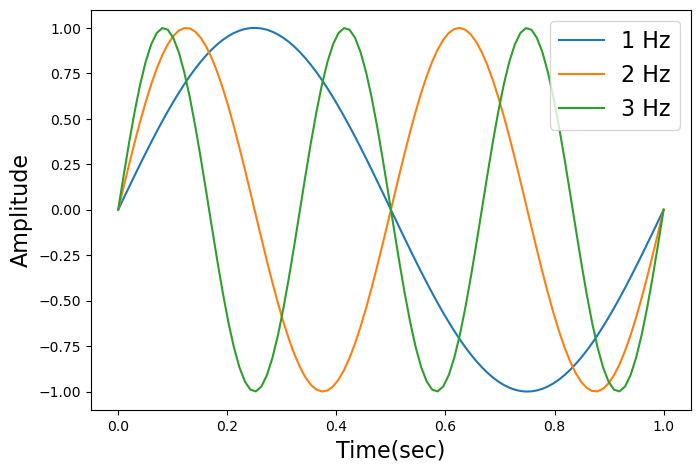

In [6]:
duration = 1
timesteps = np.linspace(0,duration,100)
anglesteps = timesteps*2*np.pi
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
for j in range(3):
    frequency = j+1
    sinefunction = np.sin(frequency*anglesteps)
    ax.plot(timesteps,sinefunction,label=str(j+1)+' Hz')
ax.set_xlabel('Time(sec)',fontsize = 16)
ax.set_ylabel('Amplitude',fontsize = 16)
ax.legend(fontsize = 16)
plt.show()

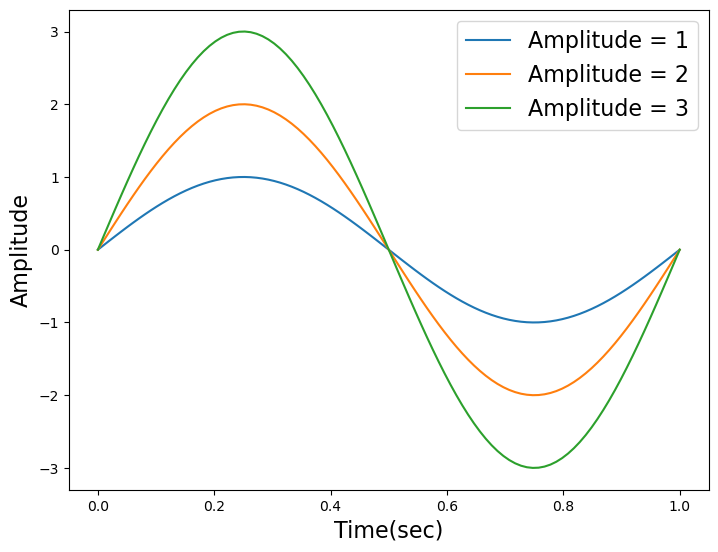

In [7]:
duration = 1
timesteps = np.linspace(0,duration,100)
anglesteps = timesteps*2*np.pi
frequency = 1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(3):
    sinefunction = (j+1)*np.sin(frequency*anglesteps)
    ax.plot(timesteps,sinefunction,label='Amplitude = ' + str(j+1))
ax.set_xlabel('Time(sec)',fontsize =16)
ax.set_ylabel('Amplitude',fontsize =16)
ax.legend(fontsize=16)
plt.show()

## Sampling Rate

### When we make sound with a musical instrument or your voice it is an analog signal that is continuous in time. 

### When specifying sound on a computer, we have represent it as a discrete set of numbers. 

### Thus, we have to make a sound with a particular **sampling rate** or number of samples per second. 

### Sampling rate is a frequency that specififies how often we represent a sample of sound Notice this unit is also Hz.  

### In the examples above, the sampling rate was implicitly 100 samples/second or 100 Hz. 

### The sampling rate you need depends largely on the type of frequencies you need to represent. 

### Human beings can hear sounds from 20 Hz up to around 20,000 Hz.  (really 15,000 Hz, and as you get older that gets lower). 

### To allow us to play all of these audible sounds, sounds card use a standard sampling rate of 44,100. 

## Sinusoidal pure tone
### $ tone = A* sin(2*\pi*f*t)$
### A - volume
### f - frequency
### t - discrete time points 


In [8]:
# create a sinusoidal sound wave
sr = 44100     # how many samples per second 
duration = 0.5 # length of the sound in seconds. 
frequency = 300        # frequency of the sinewave in Hz
volume = 0.25   # DO NOT MAKE VOLUME LARGER THAN 0.5 
time = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate. 
tone = np.sin(frequency * time  * 2 * np.pi) # instead of creating a vector angles, just multiply by 2pi 
                                                      #inside the call to the sin function.  


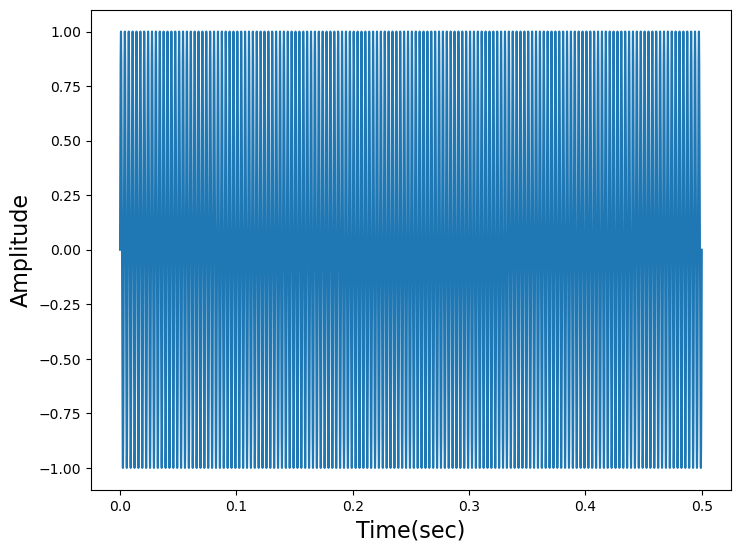

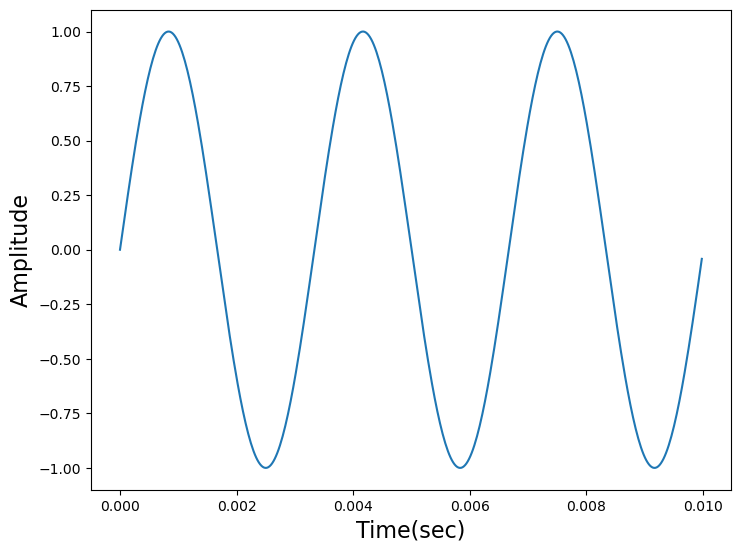

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time,tone)
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[0:441],tone[0:441])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()

In [10]:
# A sin function will always return values between -1 and 1
# the sample amplitude values must consequently fall in the range of -32768 to 32767. 
# they must also have a signed 16-bit integer dtype (=2 bytes) and 
#test_note  = test_note*32767 / np.max(np.abs(test_note)) forces the values to scale so that the 
#it fills the range from -32768 to 32767
# NEVER DO THIS! THIS IS DANGEROUS TO YOUR EARS!!!.
# ALWAYS MULTIPLE BY VOLUME!!!!  
tone  = tone*32768 / np.max(np.abs(tone)) # scale to the range of the sound card.   
tone = volume*tone # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM VOLUME to 0.5! 


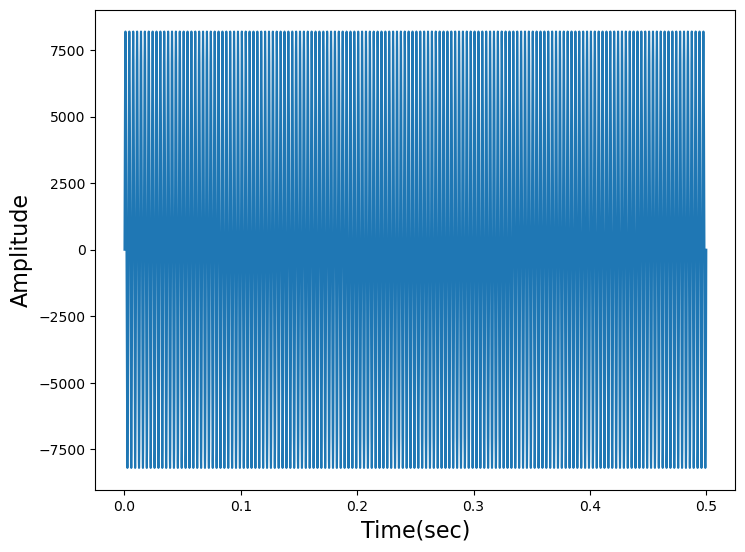

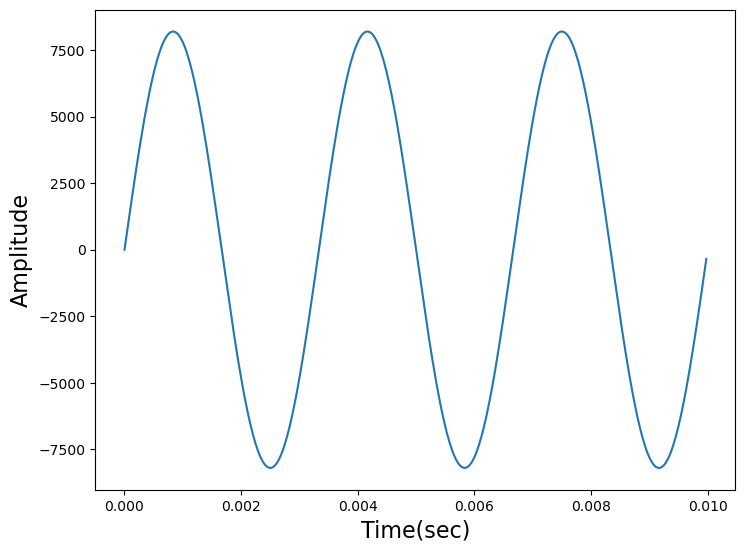

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time,tone)
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[0:441],tone[0:441])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()



In [12]:
test_note  = test_note.astype(np.int16) # convert to 16 bit integers
sa.play_buffer(test_note , 1, 2, sr) 
#there are 4 required paramters here.
#  audio_data - the numpy array or wav object you want to play 
#  num_channels - number of channels.  Defaults to num_channels=2 for stereo (here we do 1 channel mono, which plays the same sound to both ears) 
#  bytes_per_sample - what type of integer.  A 16 bit integer has 2 bytes per sample, Defaults to bytes_per_sample=2
#  sample_rate= sampling rate, or samples per second, default to 44100 (its good practice to specify this)


## Musical Scale (Western - 12 tone equal temperament)

### Musical notes correspond to different frequencies of sound. 

### A can have frequencies 440, 880, 1760, 3520, ....  

### These frequencies are the start of an octave that contains 12 different notes. 



### For example:
* ### A = 440
* ### Bb = 466 (B flat)
* ### B = 494
* ### C = 523
* ### C# = 554 (C sharp)
* ### D = 587
* ### Eb = 622 (E flat)
* ### E = 659
* ### F = 698
* ### F# = 740 (F sharp)
* ### G = 784
* ### Ab = 831 (A flat)
-----
* ### A = 880
.
.
.



### We can produce each of these frequencies within an octave by the formula 

### $f = 440*2^{\frac{n}{12}}$  where $ n = 0,1,2,.... 11$ 

### or in python we would write 

    f = 440*2**(n/12)

### Of course, we don't have to start at 440, we could start an octave at 880. 
### The formula above still works, with $n = 12,13,14,.... 23$  

### But to make it easier to understand, lets make it so that there are two parameters, one for the octave, $noctave = 1,2,3.....$
### and one for the note,  $ n = 0,1,2,.... 11$ 

    f = noctave*440*2**(n/12)

In [13]:
#This is  really ugly.
sr = 44100     # how many samples per second 
duration = 0.5 # length of the sound. 
f = 440        # base frequency of the sinewave in Hz corresponding to the lowest A
noctave = 1   # this sets the octave
starting_freq = f*noctave # sets the frequency of A 
volume = 0.25  # we are controlling the volume 
time_vec = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate. 
for j in range(12):
    f = starting_freq*2**(j/12) # this is the frequency 
    test_note = np.sin(f * time_vec  * 2 * np.pi)
    test_note  = test_note*32768 / np.max(np.abs(test_note)) # scale to the range of the sound card.  
    test_note = volume*test_note # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM VOLUME! 
    test_note  = test_note.astype(np.int16) # convert to 16 bit integers. 
    play_obj = sa.play_buffer(test_note , 1, 2, sr) # i created an object here. 
    play_obj.wait_done() # tells python to wait for the sound to finish before going any further. 

In [14]:
def make_tone(f,duration,sr = 44100):
    time_vec = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate.
    tone = np.sin(f * time_vec  * 2 * np.pi)
    return tone

In [15]:
def play_sound(tone,volume = 0.25,sr = 44100):
    tone  = tone*32768 / np.max(np.abs(test_note)) # scale to the range of the sound card.  
    tone = volume*tone # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM VOLUME! 
    tone  = tone.astype(np.int16) # convert to 16 bit integers. 
    play_obj = sa.play_buffer(tone , 1, 2, sr) # i created an object here. 
    play_obj.wait_done() # tells python to wait for the sound to finish before going any further. 

In [16]:
duration = 0.5 # length of the sound. 
f_A = 440        # base frequency of the sinewave in Hz
noctave = 1   # this sets the octave. 
volume = 0.3  # we are controlling the volume 
scale = test_note #initialize with the A 
for j in range(12):  #loop through the notes.    
    f = noctave*f_A*2**(j/12) # this is the frequency
    test_note = make_tone(f,duration)
    play_sound(test_note,volume = volume)  

## SILENCE

### Silence is simply zeros.  Suppose we wanted to add a pause of 0.25 seconds between the notes. 
### We would create a  numpy array containing zeros and concatenate with the tone. 


In [17]:
sr = 44100
duration = 0.5 # length of the sound. 
f_A = 440        # base frequency of the sinewave in Hz
noctave = 1   # this sets the octave. 
volume = 0.5  # we are controlling the volume 
scale = test_note #initialize with the A 
silence_duration = 0.25 #silence duration in seconds 
silence_samples = silence_duration*sr #how many samples of silence
silence = np.zeros(int(silence_samples)) # an array of zeros of the length of silence 
for j in range(12):  #loop through the notes.    
    f = noctave*f_A*2**(j/12) # this is the frequency
    test_note = make_tone(f,duration)
    play_note = np.concatenate((test_note,silence))
    play_sound(play_note,volume = volume)  


## Why is there an ANNOYING pop in the sound I am playing? 

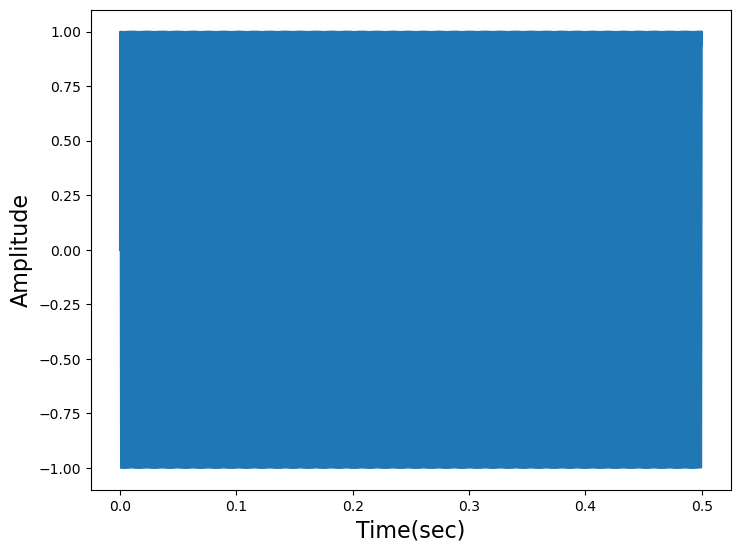

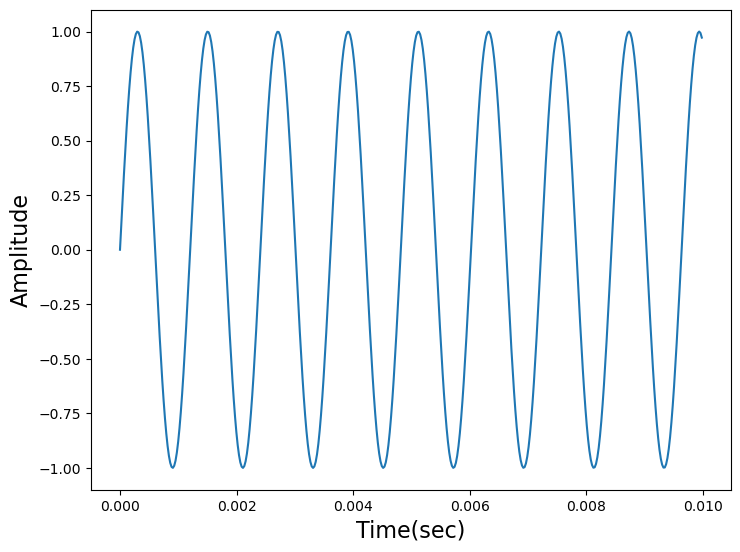

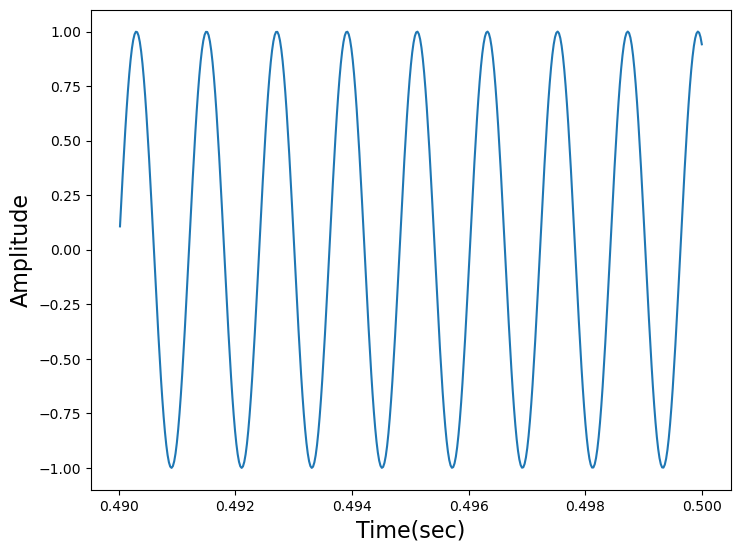

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec,test_note)
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[0:441],test_note[0:441])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[-441:],test_note[-441:])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()

### Ramp on and Ramp off

### When working with auditory stimuli it is often a good idea to ramp of and ramp off the stimuli to eliminate the pop

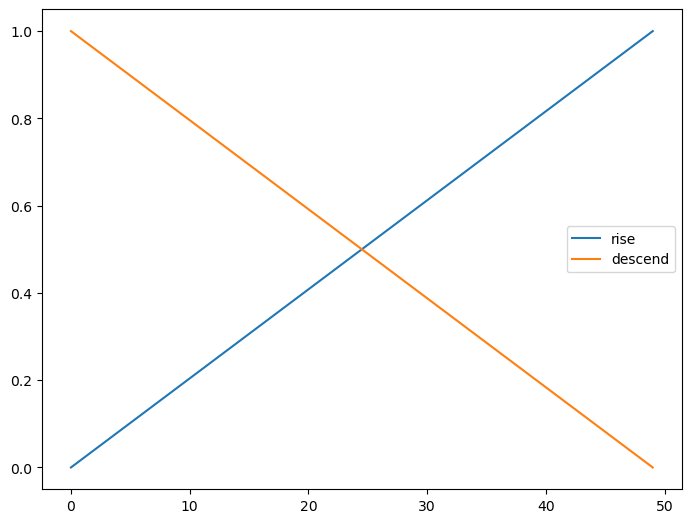

(50,)
(50,)


In [19]:
risingramp = np.linspace(0,1,50)
descendingramp = np.linspace(1,0,50)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(risingramp,label = 'rise')
ax.plot(descendingramp,label = 'descend')
ax.legend()
plt.show()
print(np.shape(risingramp))
print(np.shape(descendingramp))


In [20]:
def make_tone(f,duration,sr = 44100,ramp = 200):
    time_vec = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate.
    tone = np.sin(f * time_vec  * 2 * np.pi)
    risingramp = np.linspace(0,1,ramp)
    descendingramp = np.linspace(1,0,ramp)
    tone[0:ramp] = tone[0:ramp]*risingramp
    tone[-ramp:] = tone[-ramp:]*descendingramp
    return tone

In [21]:
sr = 44100
duration = 0.5 # length of the sound. 
f_A = 440        # base frequency of the sinewave in Hz
noctave = 1   # this sets the octave. 
volume = 0.5  # we are controlling the volume 
scale = test_note #initialize with the A 
silence_duration = 0.1 #silence duration in seconds 
silence_samples = silence_duration*sr #how many samples of silence
silence = np.zeros(int(silence_samples)) # an array of zeros of the length of silence 
for j in range(12):  #loop through the notes.    
    f = noctave*f_A*2**(j/12) # this is the frequency
    test_note = make_tone(f,duration)
    play_note = np.concatenate((test_note,silence))
    play_sound(play_note,volume = volume)  


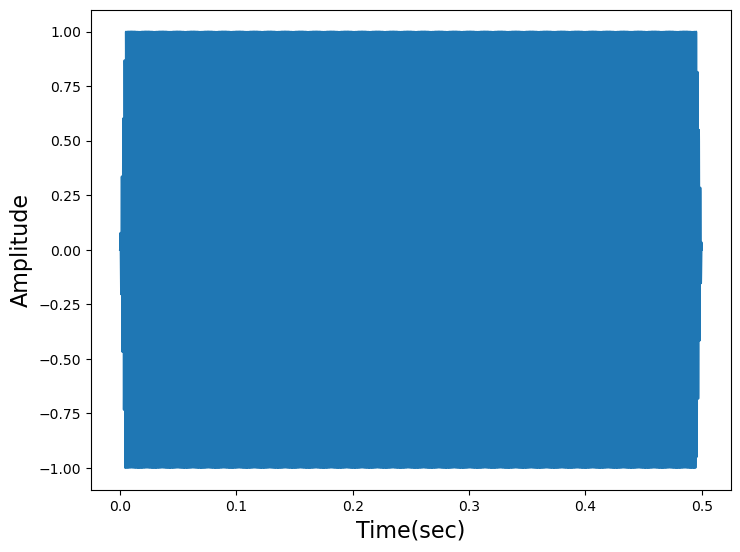

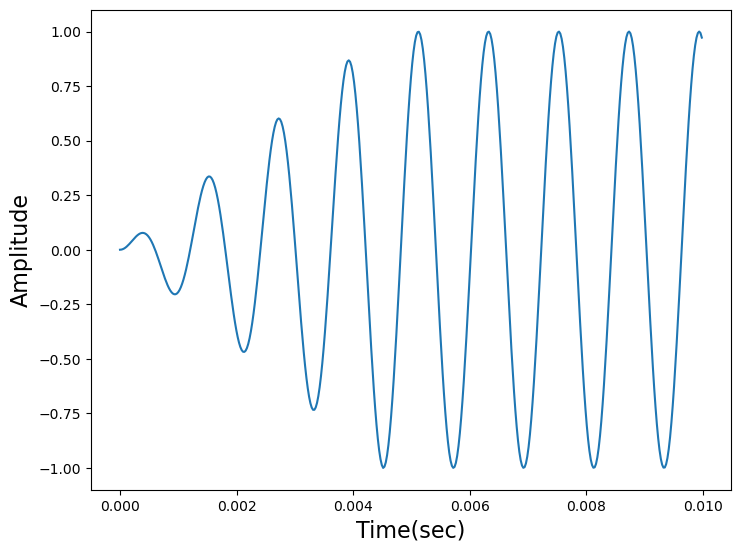

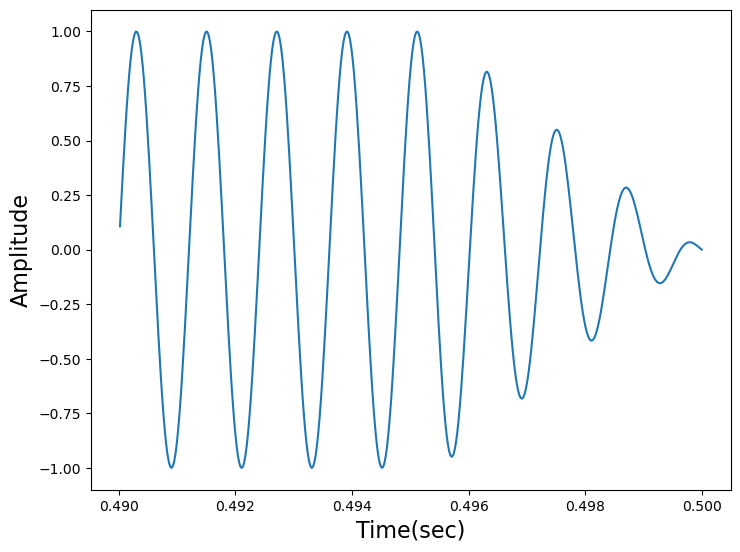

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec,test_note)
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[0:441],test_note[0:441])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[-441:],test_note[-441:])
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()

## Noise 

### Auditory noise, often labeled loosely as "white noise" is simply random numbers passed through the sound card. 

In [23]:
sr = 44100
duration = 0.5 
volume = 0.1
nsamples = np.floor(duration*sr) # I used floor as i wanted to be sure it was less than 0.5
noise_sample = rng.uniform(-1,1,nsamples.astype(int))
noise_sample = volume*32768*noise_sample
noise_sample = noise_sample.astype(np.int16)
play_obj = sa.play_buffer(noise_sample , 1, 2, sr) # i created an object here. 
play_obj.wait_done() # tells python to wait for the sound to finish before going any further. 

### Why is that useful.  Well sometimes we want to mask a sound in noise